<center> <h3 style="background-color:#ADD8E6; color:black;">Importing Libararies</h3> </center>

In [1]:
import numpy as np 
import pandas as pd


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


import seaborn as sb
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
train = pd.read_csv("D:/Nour/Semester 7/Machine Learning/Project/fashion-mnist_train.csv")
test = pd.read_csv("D:/Nour/Semester 7/Machine Learning/Project/fashion-mnist_test.csv")

In [4]:
label = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [5]:
# Splitting the data into X_train, y_train, X_test, y_test
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [ ]:
# Normalizing the data
X_train /= 255
X_test /= 255

In [8]:
# PCA transformation, using the same number of components as SVM model
pca = PCA(n_components=400)
pca.fit(X_train)
X_trainpca = pca.transform(X_train)
X_testpca = pca.transform(X_test)

In [9]:
# Checking performance of Random Forest model
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_trainpca, y_train)
y_pred = RF.predict(X_testpca)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy )

Accuracy: 0.8582


In [10]:
# Checking performance of XGBoost model
XGB = xgb.XGBClassifier(n_estimators=100, random_state=0)
XGB.fit(X_trainpca, y_train)

y_pred = XGB.predict(X_testpca)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy )

Accuracy: 0.8831


This initial check was done to see which model peforms better to further tune the parameters. XGBoost performed better, this could be due to the fact that XGBoost learns from the errors of previous trees while in Random Forest each tree is independent of the other. So any further analysis in this notebook is done on XGBoost.

<center> <h3 style="background-color:#ADD8E6; color:black;">Parameter Tuning</h3> </center>

In [11]:
from pandas import DataFrame
estimators = [50, 100, 200, 250]
accuracytest = []
accuracytrain = []
df = DataFrame(columns=['estimators', 'train_acc', 'test_acc', 'time'])
k = 0
for i in estimators:
    XGB = xgb.XGBClassifier(n_estimators=i, random_state=0)

    XGB.fit(X_trainpca, y_train)
    XGB_start = time.time()

    y_pred = XGB.predict(X_testpca)
    XGB_end = time.time()


    testacc = accuracy_score(y_test, y_pred)
    print('Test Accuracy for estimators',i, ":",testacc )

    y_predtrain = XGB.predict(X_trainpca)
    trainacc = accuracy_score(y_train, y_predtrain)

    accuracytest.append(testacc)
    accuracytrain.append(trainacc)
    XGB_time = XGB_end - XGB_start

    print("Train Accuracy of estimtors ", i,":", trainacc)
    df.loc[k] = [i,trainacc, testacc, XGB_time]
    k += 1

Test Accuracy for estimators 50 : 0.8741
Train Accuracy of estimtors  50 : 0.98485
Test Accuracy for estimators 100 : 0.8831
Train Accuracy of estimtors  100 : 0.9999166666666667
Test Accuracy for estimators 200 : 0.8894
Train Accuracy of estimtors  200 : 1.0
Test Accuracy for estimators 250 : 0.8919
Train Accuracy of estimtors  250 : 1.0


In [12]:
estimators = [300, 400, 500, 600]

for i in estimators:
    XGB = xgb.XGBClassifier(n_estimators=i, random_state=0)

    XGB.fit(X_trainpca, y_train)
    XGB_start = time.time()

    y_pred = XGB.predict(X_testpca)
    XGB_end = time.time()


    testacc = accuracy_score(y_test, y_pred)
    print('Test Accuracy for estimators',i, ":",testacc )

    y_predtrain = XGB.predict(X_trainpca)
    trainacc = accuracy_score(y_train, y_predtrain)

    accuracytest.append(testacc)
    accuracytrain.append(trainacc)
    XGB_time = XGB_end - XGB_start

    print("Train Accuracy of estimtors ", i,":", trainacc)
    df.loc[k] = [i,trainacc, testacc, XGB_time]
    k += 1

Test Accuracy for estimators 300 : 0.8927
Train Accuracy of estimtors  300 : 1.0
Test Accuracy for estimators 400 : 0.8937
Train Accuracy of estimtors  400 : 1.0
Test Accuracy for estimators 500 : 0.894
Train Accuracy of estimtors  500 : 1.0
Test Accuracy for estimators 600 : 0.8943
Train Accuracy of estimtors  600 : 1.0


In [13]:
df

,estimators,train_acc,test_acc,time
0,50.0,0.984850,0.8741,0.086380
1,100.0,0.999917,0.8831,0.077635
2,200.0,1.000000,0.8894,0.613674
3,250.0,1.000000,0.8919,0.393306
4,300.0,1.000000,0.8927,2.329426
5,400.0,1.000000,0.8937,0.680958
6,500.0,1.000000,0.8940,0.703735
7,600.0,1.000000,0.8943,1.298446


Starting from number of estimators = 250, all models show very similar accuracy with difference of only 0.03, therefore we chose the model with 250 number of estimators because it had the least testing time.

In [15]:
XGB = xgb.XGBClassifier(n_estimators=250, random_state=0)

XGB.fit(X_trainpca, y_train)
XGB_start = time.time()

y_pred1 = XGB.predict(X_testpca)
XGB_end = time.time()


testacc1 = accuracy_score(y_test, y_pred1)
print('Test Accuracy:',testacc1 )

y_predtrain1 = XGB.predict(X_trainpca)
trainacc1 = accuracy_score(y_train, y_predtrain1)

XGB_time = XGB_end - XGB_start

print("Train Accuracy:",  trainacc1)


Test Accuracy: 0.8919
Train Accuracy: 1.0


<center> <h3 style="background-color:#ADD8E6; color:black;">Model evaluation</h3> </center>

In [16]:
# Classification Report on XGBoost classifier
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred1, target_names = label))

              precision    recall  f1-score   support

 T-shirt/Top       0.82      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.82      0.82      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.84      0.87      0.85      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.74      0.69      0.71      1000
     Sneaker       0.93      0.93      0.93      1000
         Bag       0.97      0.97      0.97      1000
  Ankle Boot       0.93      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



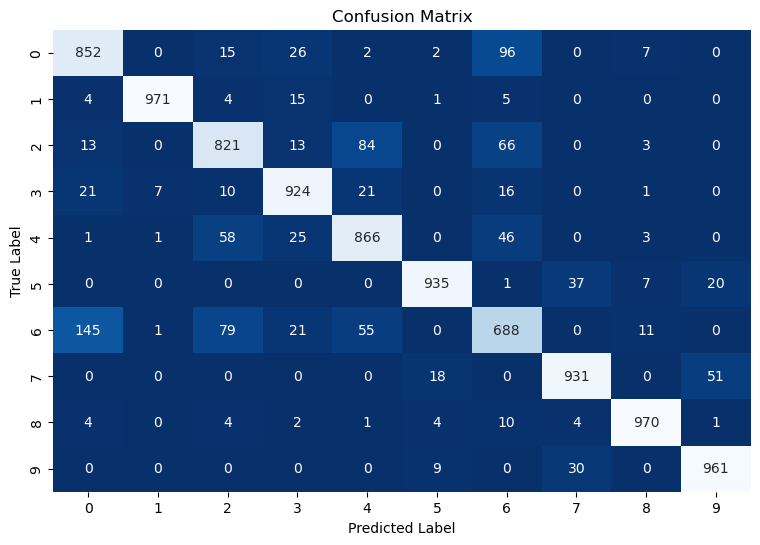

In [17]:
# Confusion Matrix for XGBoost Classifier
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Similarl to SVM, Shirt class also shows the highest number of misclassifications